# Project

In [1]:
import numpy as np
import pandas as pd 
from random import gauss
from math import sqrt
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import log, sqrt, exp
from scipy.stats import norm
from glob import glob
import warnings
import os
from functools import reduce
warnings.filterwarnings("ignore")

# Data Acquisition and Cleaning - 10 years daily from NASDAQ 100 Technology Sector 

In [2]:
# function for reading files
def read_file(f):
    df = pd.read_csv(f)
    df['ticker'] = f.split('.')[0].strip('^')
    return df

# function for getting log-returns
def getlogret(data):
    logret = np.log(data) - np.log(data.shift(1))
    return logret

In [27]:
# create the dataframe for closing price, named as 'close'
close = pd.concat([read_file(f) for f in glob('*.csv')])
close = close.set_index(['Date','ticker'])[['Close']].unstack()
close

Close                                                    \
ticker            AAPL        AMD        BIDU        GOOGL          IXIC   
Date                                                                       
2011-06-01   12.339643   8.370000  132.470001   263.063049   2769.189941   
2011-06-02   12.360714   8.240000  138.490005   264.294281   2773.310059   
2011-06-03   12.265714   7.970000  133.210007   261.801788   2732.780029   
2011-06-06   12.072857   7.800000  126.970001   260.790802   2702.560059   
2011-06-07   11.858571   7.710000  124.820000   259.774780   2701.560059   
...                ...        ...         ...          ...           ...   
2021-05-24  127.099998  77.440002  188.960007  2361.040039  13661.169922   
2021-05-25  126.900002  77.860001  192.770004  2362.870117  13657.169922   
2021-05-26  126.849998  78.339996  194.880005  2380.310059  13738.000000   
2021-05-27  125.279999  78.419998  194.809998  2362.679932  13736.280273   
2021-05-28  124.610001  80.080002  196.270004  2356.850098  13748.740234   

                                                                         \
ticker            MSFT         NDXT        NVDA        NXPI        QCOM   
Date                                                                      
2011-06-01   24.430000  1433.280029   19.139999   27.100000   57.150002   
2011-06-02   24.219999  1438.209961   19.049999   26.510000   57.799999   
2011-06-03   23.910000  1409.640015   18.459999   26.700001   57.040001   
2011-06-06   24.010000  1396.780029   18.070000   26.549999   56.480000   
2011-06-07   24.059999  1397.560059   18.059999   26.580000   56.509998   
...                ...          ...         ...         ...         ...   
2021-05-24  250.779999  8000.270020  624.479980  204.380005  132.910004   
2021-05-25  251.720001  8033.209961  625.909973  204.759995  133.750000   
2021-05-26  251.490005  8053.779785  628.000000  206.139999  133.089996   
2021-05-27  249.309998  8019.879883  619.520020  210.220001  133.639999   
2021-05-28  249.679993  8064.850098  649.780029  211.419998  134.539993   

                                    
ticker            SWKS         TXN  
Date                                
2011-06-01   24.559999   33.950001  
2011-06-02   24.920000   34.240002  
2011-06-03   23.059999   33.500000  
2011-06-06   23.280001   33.320000  
2011-06-07   25.080000   33.270000  
...                ...         ...  
2021-05-24  168.880005  188.690002  
2021-05-25  170.029999  188.699997  
2021-05-26  168.850006  188.360001  
2021-05-27  170.869995  189.130005  
2021-05-28  170.000000  189.820007  

[2516 rows x 12 columns]

In [28]:
# create the dataframe for logreturns, named as 'logret'
logret = close
for i in range(0,len(close.axes[1])):
    logret.iloc[:,i] = getlogret(close.iloc[:,i])
logret = logret.iloc[1:].rename(columns={'Close': 'Logret'})
logret

Logret                                                    \
ticker          AAPL       AMD      BIDU     GOOGL      IXIC      MSFT   
Date                                                                     
2011-06-02  0.001706 -0.015654  0.044442  0.004669  0.001487 -0.008633   
2011-06-03 -0.007715 -0.033316 -0.038871 -0.009475 -0.014722 -0.012882   
2011-06-06 -0.015848 -0.021561 -0.047976 -0.003869 -0.011120  0.004174   
2011-06-07 -0.017909 -0.011606 -0.017078 -0.003904 -0.000370  0.002080   
2011-06-08  0.000602 -0.011742 -0.033813  0.000270 -0.009738 -0.005000   
...              ...       ...       ...       ...       ...       ...   
2021-05-24  0.013226  0.003493 -0.003012  0.028749  0.014019  0.022624   
2021-05-25 -0.001575  0.005409  0.019962  0.000775 -0.000293  0.003741   
2021-05-26 -0.000394  0.006146  0.010886  0.007354  0.005901 -0.000914   
2021-05-27 -0.012454  0.001021 -0.000359 -0.007434 -0.000125 -0.008706   
2021-05-28 -0.005362  0.020947  0.007467 -0.002471  0.000907  0.001483   

                                                                        
ticker          NDXT      NVDA      NXPI      QCOM      SWKS       TXN  
Date                                                                    
2011-06-02  0.003434 -0.004713 -0.022012  0.011309  0.014552  0.008506  
2011-06-03 -0.020065 -0.031461  0.007142 -0.013236 -0.077571 -0.021849  
2011-06-06 -0.009165 -0.021353 -0.005634 -0.009866  0.009495 -0.005388  
2011-06-07  0.000558 -0.000554  0.001129  0.000531  0.074476 -0.001502  
2011-06-08 -0.015089 -0.027507 -0.043443 -0.003723 -0.026668 -0.018199  
...              ...       ...       ...       ...       ...       ...  
2021-05-24  0.018961  0.040540  0.022464  0.010970  0.012993  0.019696  
2021-05-25  0.004109  0.002287  0.001858  0.006300  0.006786  0.000053  
2021-05-26  0.002557  0.003334  0.006717 -0.004947 -0.006964 -0.001803  
2021-05-27 -0.004218 -0.013595  0.019599  0.004124  0.011892  0.004080  
2021-05-28  0.005592  0.047689  0.005692  0.006712 -0.005105  0.003642  

[2515 rows x 12 columns]

# Data Analysis - use the historical data to predict the future

Volatility

In [32]:
# define functions for actual/predicted volatility and the absolute error between them

def volpred(df, n):
    # keep the index for non-overlapped rolling window. eg for a=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], a[2::3]=[2, 5, 8]
    return df.rolling(n).std()[n-1::n] 

def volerr(df, n):
    df_volpred = volpred(df, n) 
    df_volerr = (df_volpred - df_volpred.shift(1)).rename(columns={'Logret': 'Residual Error (Volatility)'})
    return df_volerr

def volabserr(df, n):
    df_volpred = volpred(df, n)
    df_volabserr = (df_volpred - df_volpred.shift(1)).abs().rename(columns={'Logret': 'Absolute Error (Volatility)'})
    return df_volabserr

Try with time window = 20

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

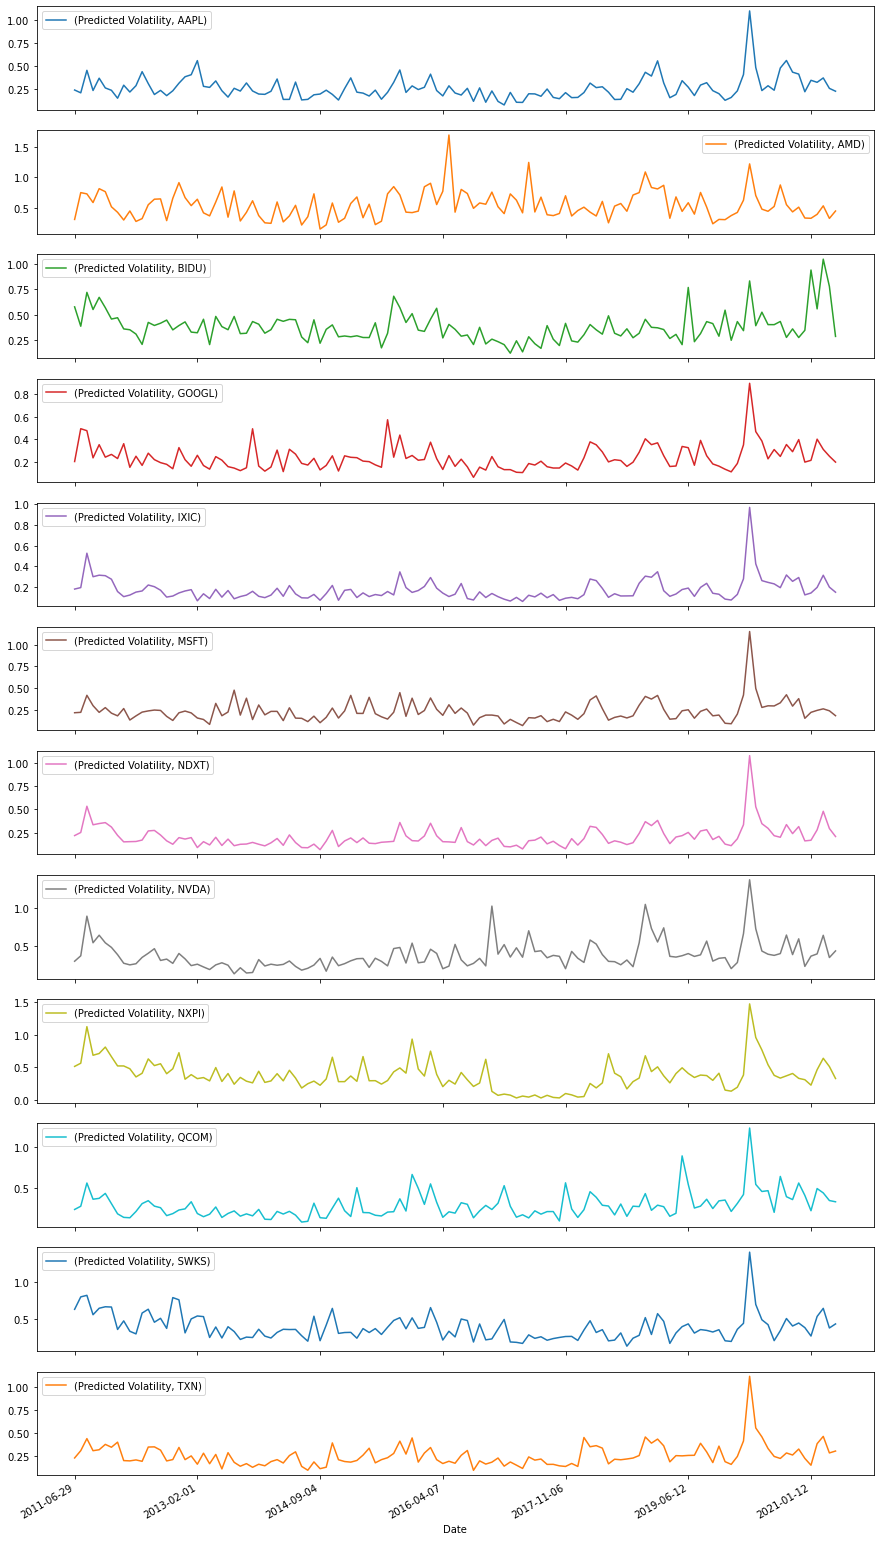

In [33]:
# Plot the predicted volatility
(volpred(logret,20).rename(columns={'Logret': 'Predicted Volatility'})*np.sqrt(260)).plot(figsize = (15,30), subplots=True)

In [34]:
# create the dataframe for the residual error (actual-predict)
myvolerr = volerr(logret, 20).iloc[1:]
print(myvolerr)

           Residual Error (Volatility)                                \
ticker                            AAPL       AMD      BIDU     GOOGL   
Date                                                                   
2011-07-28                   -0.001884  0.027263 -0.011788  0.018012   
2011-08-25                    0.015073 -0.001298  0.020615 -0.001088   
2011-09-23                   -0.013509 -0.008815 -0.010443 -0.014907   
2011-10-21                    0.008247  0.014105  0.007430  0.007223   
2011-11-18                   -0.006529 -0.003050 -0.006302 -0.006834   
...                                ...       ...       ...       ...   
2021-01-12                    0.007660 -0.000267  0.036712  0.000975   
2021-02-10                   -0.001348  0.004032 -0.023660  0.011611   
2021-03-11                    0.002932  0.008622  0.030274 -0.005599   
2021-04-09                   -0.006996 -0.012751 -0.016588 -0.003755   
2021-05-07                   -0.001906  0.007494 -0.030451 -0.00

In [35]:
# create the dataframe for the absolute error
myvolabserr = volabserr(logret, 20).iloc[1:] # delete the first date which doesn't have error (NaN)
print(myvolabserr)

           Absolute Error (Volatility)                                \
ticker                            AAPL       AMD      BIDU     GOOGL   
Date                                                                   
2011-07-28                    0.001884  0.027263  0.011788  0.018012   
2011-08-25                    0.015073  0.001298  0.020615  0.001088   
2011-09-23                    0.013509  0.008815  0.010443  0.014907   
2011-10-21                    0.008247  0.014105  0.007430  0.007223   
2011-11-18                    0.006529  0.003050  0.006302  0.006834   
...                                ...       ...       ...       ...   
2021-01-12                    0.007660  0.000267  0.036712  0.000975   
2021-02-10                    0.001348  0.004032  0.023660  0.011611   
2021-03-11                    0.002932  0.008622  0.030274  0.005599   
2021-04-09                    0.006996  0.012751  0.016588  0.003755   
2021-05-07                    0.001906  0.007494  0.030451  0.00

<AxesSubplot:xlabel='Date'>

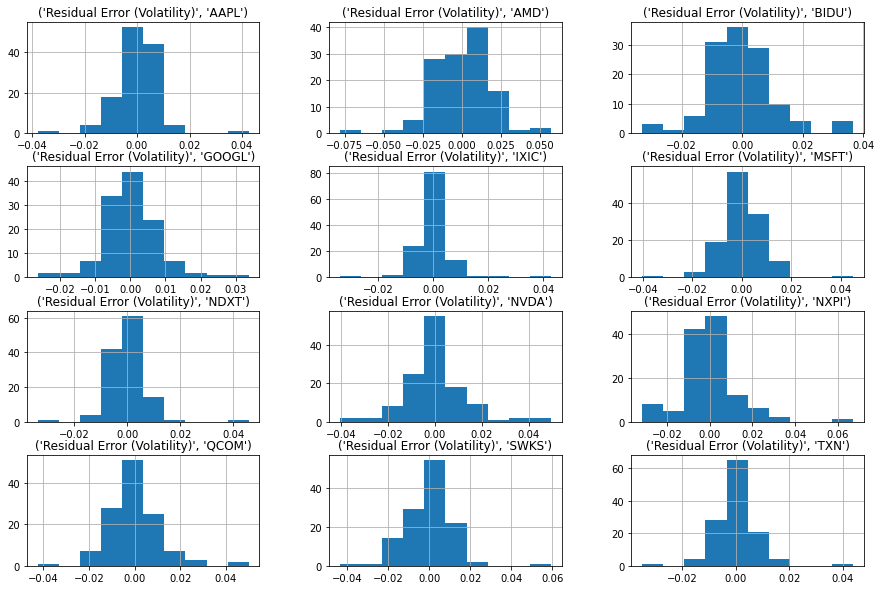

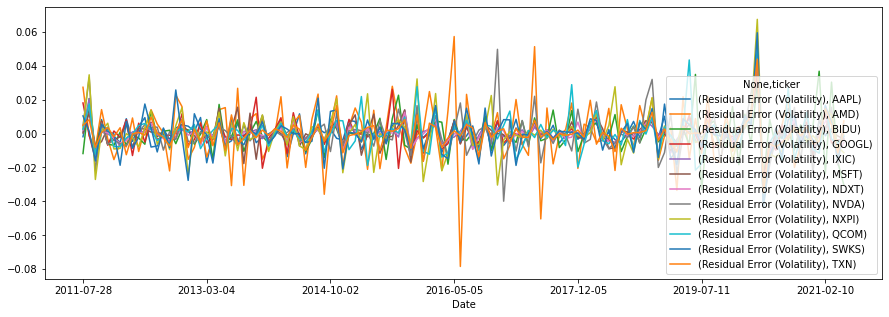

In [36]:
# visualize the residual error
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
myvolerr.hist(ax = ax)
myvolerr.plot(figsize = (15,5))

<AxesSubplot:xlabel='Date'>

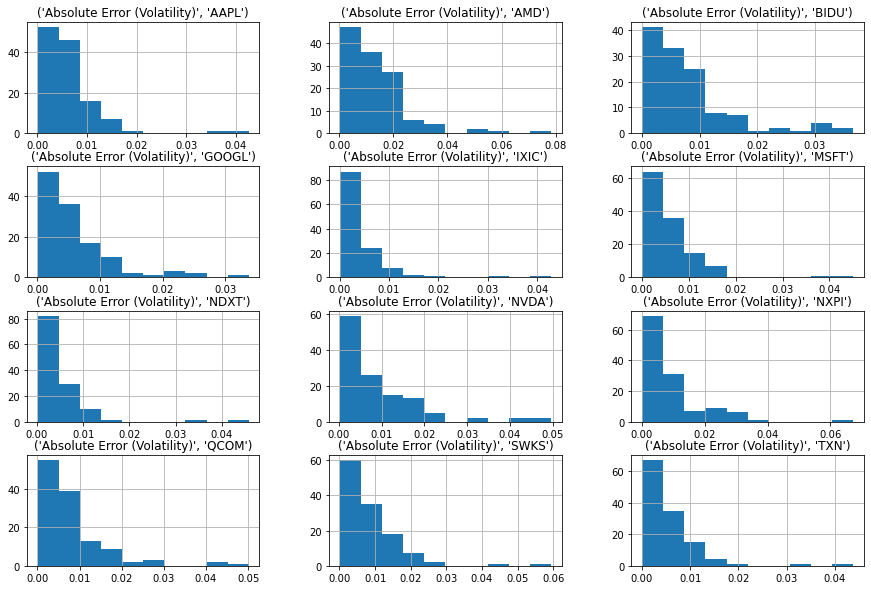

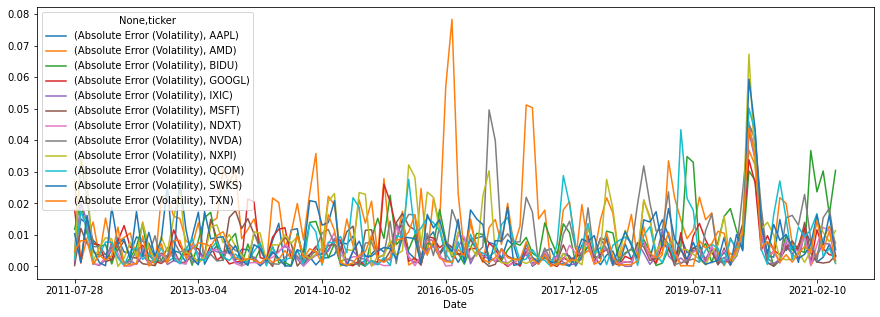

In [37]:
# visualize the absolute error
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
myvolabserr.hist(ax = ax)
myvolabserr.plot(figsize = (15,5))

Mean

In [44]:
# define functions for actual/predicted mean and the absolute error between them

def meanpred(df, n):
    return df.rolling(n).mean()[n-1::n]

def meanerr(df, n):
    df_meanpred = meanpred(df, n)
    df_meanerr = (df_meanpred - df_meanpred.shift(1)).rename(columns={'Logret': 'Residual Error (Mean)'})
    return df_meanerr 

def meanabserr(df, n):
    df_meanpred = meanpred(df, n)
    df_meanabserr = (df_meanpred - df_meanpred.shift(1)).abs().rename(columns={'Logret': 'Absolute Error (Mean)'})
    return df_meanabserr

Try with time window = 20

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

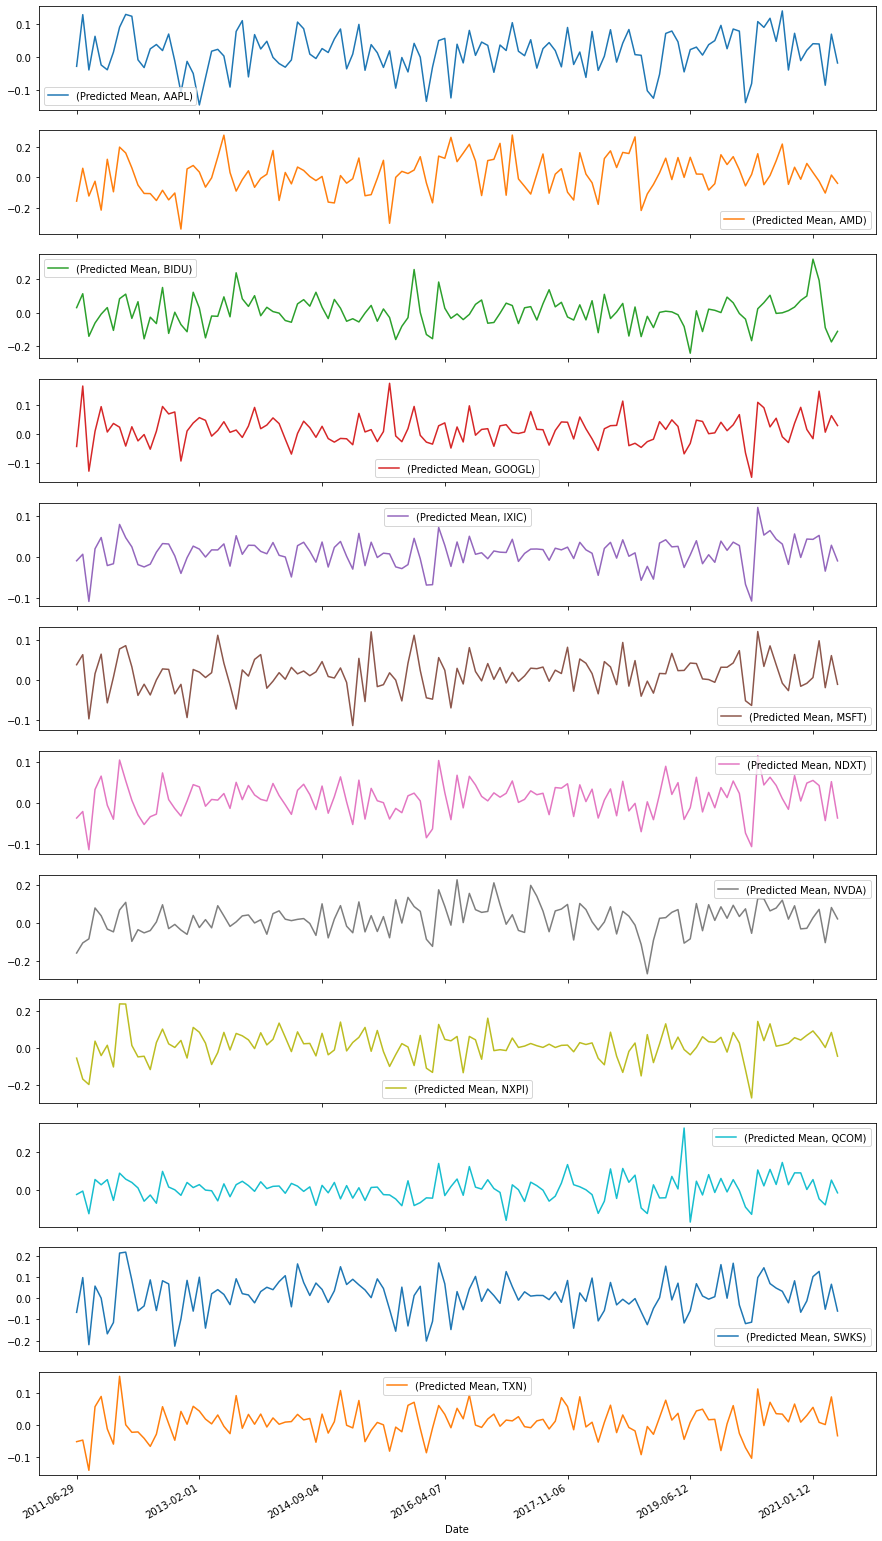

In [45]:
# Plot the predicted volatility
(meanpred(logret,20).rename(columns={'Logret': 'Predicted Mean'})*np.sqrt(260)).plot(figsize = (15,30), subplots=True)

<AxesSubplot:xlabel='Date'>

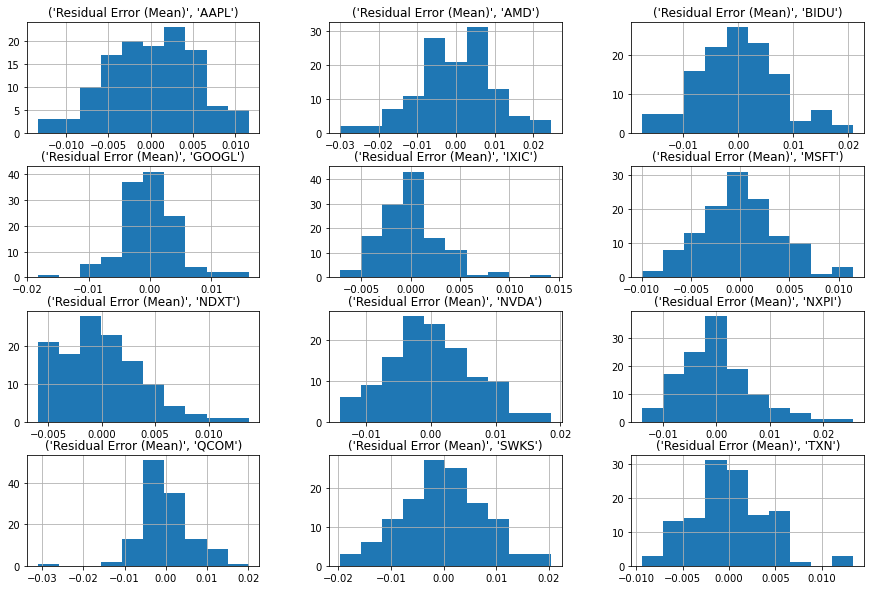

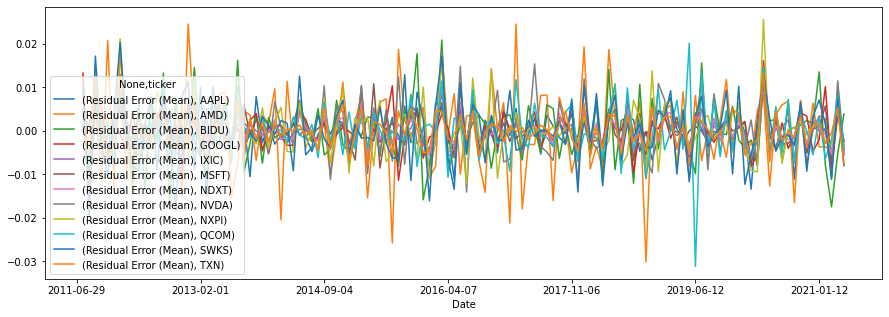

In [46]:
# create the dataframe for the absolute error and residual error
mymeanabserr = meanabserr(logret, 20)
mymeanerr = meanerr(logret, 20)

# visualize the residual error
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
mymeanerr.hist(ax = ax)
mymeanerr.plot(figsize = (15,5))

<AxesSubplot:xlabel='Date'>

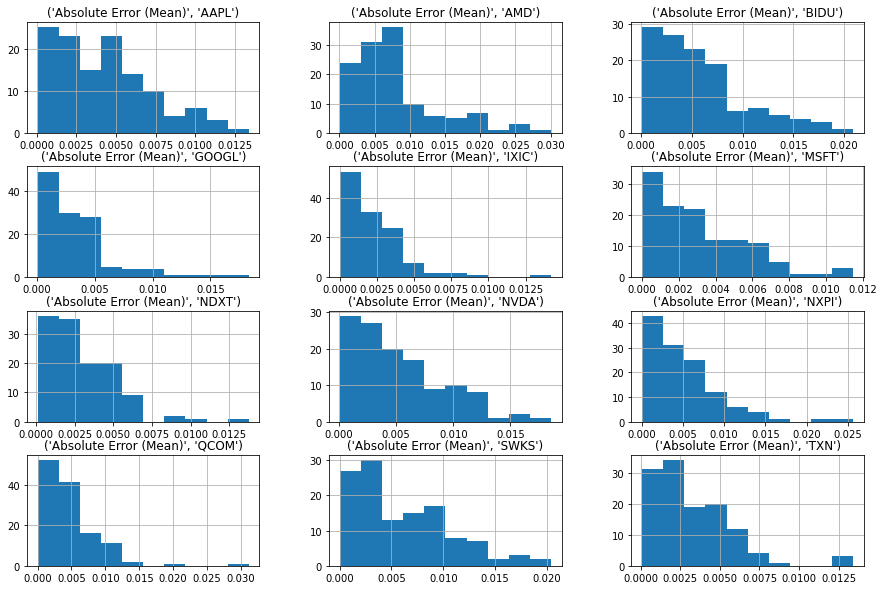

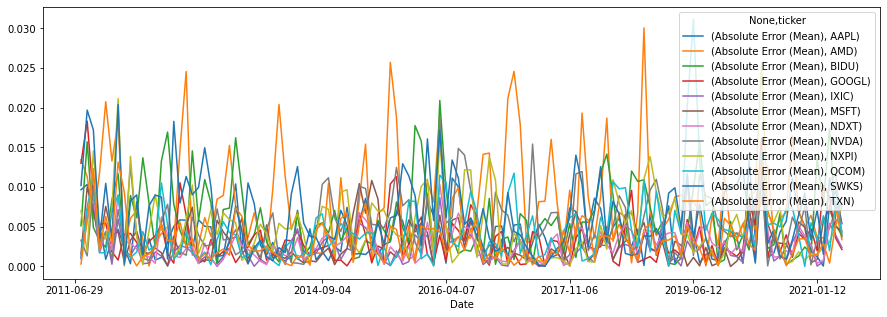

In [47]:
# visualize the absolute error
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
mymeanabserr.hist(ax = ax)
mymeanabserr.plot(figsize = (15,5))